In [56]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [110]:
df = pd.read_csv('8thSemProject/bank1hour.csv', index_col=[0])

In [111]:
df.head()

,index,date,time,open,high,low,close,id
0,BANKNIFTY,20121203,09:16,12125.70,12161.70,12125.70,12160.95,2012DECBNF.txt
44,BANKNIFTY,20121203,10:00,12117.15,12121.75,12109.10,12109.10,2012DECBNF.txt
104,BANKNIFTY,20121203,11:00,12091.65,12093.55,12090.05,12091.35,2012DECBNF.txt
164,BANKNIFTY,20121203,12:00,12095.30,12099.20,12095.30,12098.90,2012DECBNF.txt
224,BANKNIFTY,20121203,13:00,12100.40,12104.90,12100.40,12102.80,2012DECBNF.txt


In [112]:
df =df.drop(['id','time','index'],axis=1)

In [113]:
df.head()

,date,open,high,low,close
0,20121203,12125.70,12161.70,12125.70,12160.95
44,20121203,12117.15,12121.75,12109.10,12109.10
104,20121203,12091.65,12093.55,12090.05,12091.35
164,20121203,12095.30,12099.20,12095.30,12098.90
224,20121203,12100.40,12104.90,12100.40,12102.80


In [114]:
df.shape

(7821, 5)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7821 entries, 0 to 367574
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7821 non-null   int64  
 1   open    7821 non-null   float64
 2   high    7821 non-null   float64
 3   low     7821 non-null   float64
 4   close   7821 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 366.6 KB


In [116]:
df['date'] =  pd.to_datetime(df['date'].astype(str),format='%Y%m%d')

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7821 entries, 0 to 367574
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    7821 non-null   datetime64[ns]
 1   open    7821 non-null   float64       
 2   high    7821 non-null   float64       
 3   low     7821 non-null   float64       
 4   close   7821 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 366.6 KB


In [118]:
df.head()

,date,open,high,low,close
0,2012-12-03,12125.70,12161.70,12125.70,12160.95
44,2012-12-03,12117.15,12121.75,12109.10,12109.10
104,2012-12-03,12091.65,12093.55,12090.05,12091.35
164,2012-12-03,12095.30,12099.20,12095.30,12098.90
224,2012-12-03,12100.40,12104.90,12100.40,12102.80


In [119]:
df = df.drop_duplicates(subset='date', keep="last")
#df = df.drop_duplicates(subset='close', keep="last")

In [120]:
df.head()

,date,open,high,low,close
374,2012-12-03,12103.55,12103.55,12095.40,12099.75
749,2012-12-04,12186.65,12187.95,12176.35,12182.10
1124,2012-12-05,12292.25,12292.25,12286.40,12289.20
1499,2012-12-06,12476.10,12480.60,12474.35,12479.80
1874,2012-12-07,12340.60,12345.00,12337.05,12337.05


In [121]:
#plt.figure(figsize=(16,8))
#plt.title('Close Price History')
#plt.plot(df['date'],df['close'],)
#plt.xlabel('date', fontsize=18)
#plt.ylabel('Close Price', fontsize=18)
#plt.show()

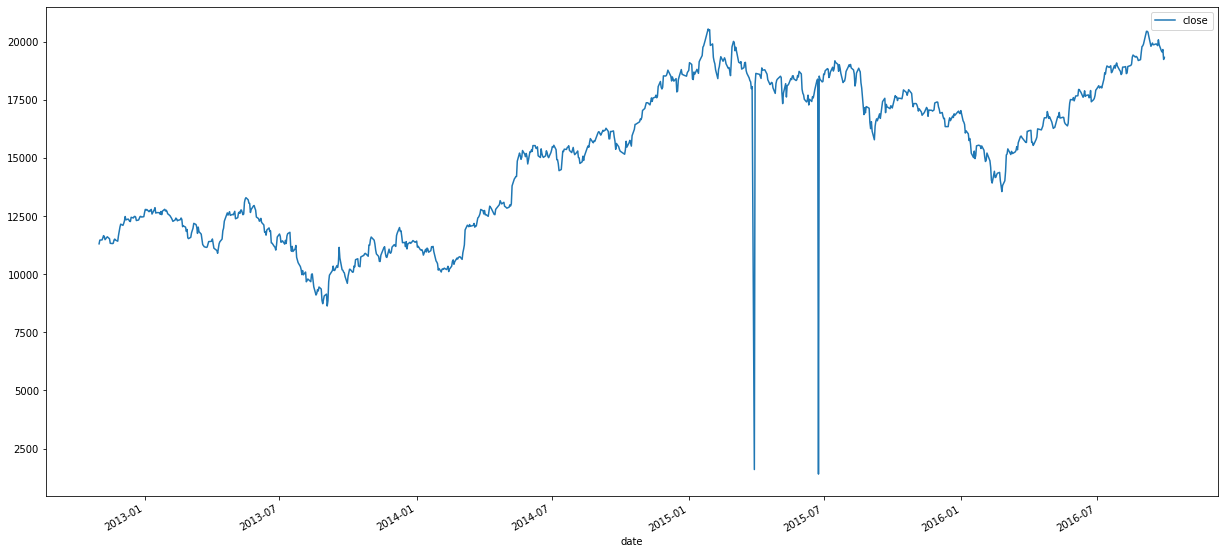

In [122]:

df.plot(x='date',y='close',figsize=(21,10))


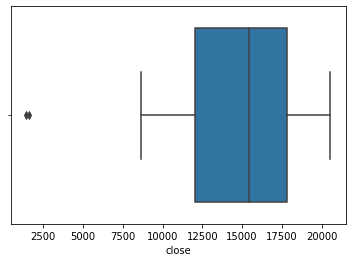

In [123]:
import seaborn as sns
sns.boxplot(x=df['close'])

In [124]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

open     5792.85
high     5795.90
low      5789.25
close    5790.20
dtype: float64


In [125]:
from scipy.stats import zscore

In [126]:
df1 =df.drop('date',axis=1)

In [127]:
df1.head()

,open,high,low,close
374,12103.55,12103.55,12095.40,12099.75
749,12186.65,12187.95,12176.35,12182.10
1124,12292.25,12292.25,12286.40,12289.20
1499,12476.10,12480.60,12474.35,12479.80
1874,12340.60,12345.00,12337.05,12337.05


In [128]:
from scipy import stats
z = np.abs(stats.zscore(df1))
print(z)

[[0.90889737 0.91051102 0.90994892 0.91021261]
 [0.88277157 0.88398635 0.88449155 0.88432182]
 [0.84957199 0.85120764 0.84988273 0.85064964]
 ...
 [1.46814214 1.46649534 1.46790144 1.46697714]
 [1.33421203 1.35217841 1.32503198 1.33249279]
 [1.35786987 1.36083664 1.35929486 1.3608359 ]]


In [129]:
df1.shape

(963, 4)

In [130]:
df1 = df1[(z < 3).all(axis=1)]

In [131]:
df1.shape

(961, 4)

In [132]:
df1.merge(df, left_on='open', right_on='open', how='outer')

,open,high_x,low_x,close_x,date,high_y,low_y,close_y
0,12103.55,12103.55,12095.40,12099.75,2012-12-03,12103.55,12095.40,12099.75
1,12186.65,12187.95,12176.35,12182.10,2012-12-04,12187.95,12176.35,12182.10
2,12292.25,12292.25,12286.40,12289.20,2012-12-05,12292.25,12286.40,12289.20
3,12476.10,12480.60,12474.35,12479.80,2012-12-06,12480.60,12474.35,12479.80
4,12340.60,12345.00,12337.05,12337.05,2012-12-07,12345.00,12337.05,12337.05
...,...,...,...,...,...,...,...,...
966,19664.35,19667.05,19656.55,19660.80,2016-09-28,19667.05,19656.55,19660.80
967,19238.35,19303.30,19202.25,19233.05,2016-09-29,19303.30,19202.25,19233.05
968,19313.60,19330.85,19311.20,19323.20,2016-09-30,19330.85,19311.20,19323.20
969,1410.00,NaN,NaN,NaN,2015-06-24,1410.95,1405.70,1405.70


In [133]:
df1.shape

(961, 4)

In [134]:
df1.head()

,open,high,low,close
374,12103.55,12103.55,12095.40,12099.75
749,12186.65,12187.95,12176.35,12182.10
1124,12292.25,12292.25,12286.40,12289.20
1499,12476.10,12480.60,12474.35,12479.80
1874,12340.60,12345.00,12337.05,12337.05


In [135]:
date = df['date']
date.shape

(963,)

In [136]:
dff = pd.concat([df1,date],axis=1)

In [137]:
dff.shape

(963, 5)

In [138]:
dff.dropna(subset = ["open"], inplace=True)

In [139]:
dff.shape

(961, 5)

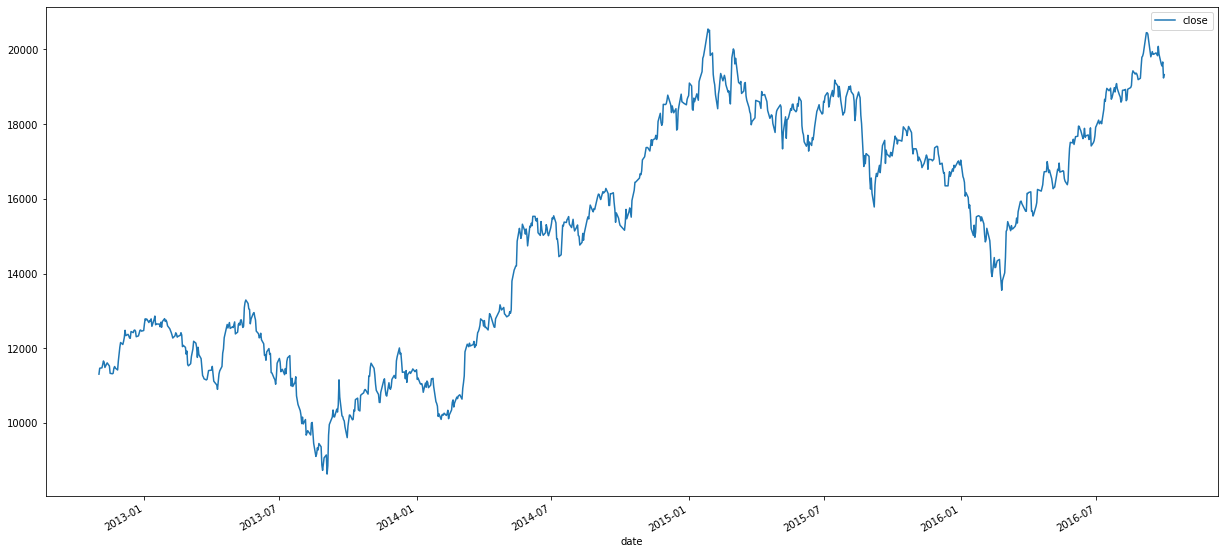

In [140]:
dff.plot(x='date',y='close',figsize=(21,10))

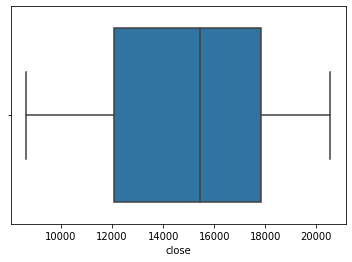

In [141]:
sns.boxplot(x=dff['close'])

In [163]:
#Create a new dataframe with only the 'Close column
data = dff.filter(['close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

769

In [164]:
print(dataset)

[[12099.75]
 [12182.1 ]
 [12289.2 ]
 [12479.8 ]
 [12337.05]
 [12371.7 ]
 [12331.3 ]
 [12275.9 ]
 [12265.05]
 [12446.5 ]
 [12418.1 ]
 [12477.8 ]
 [12487.3 ]
 [12458.  ]
 [12307.65]
 [12330.8 ]
 [12480.25]
 [12486.5 ]
 [12457.15]
 [12474.25]
 [11306.25]
 [11465.05]
 [11475.2 ]
 [11560.05]
 [11658.7 ]
 [11618.9 ]
 [11485.8 ]
 [11608.8 ]
 [11523.65]
 [11328.05]
 [11316.85]
 [11328.4 ]
 [11463.95]
 [11510.1 ]
 [11468.3 ]
 [11418.6 ]
 [11659.35]
 [12027.05]
 [12153.1 ]
 [11415.  ]
 [11514.1 ]
 [11307.6 ]
 [11119.  ]
 [11092.2 ]
 [11017.5 ]
 [10899.1 ]
 [11114.9 ]
 [11310.5 ]
 [11394.7 ]
 [11511.3 ]
 [11868.65]
 [11978.6 ]
 [12280.35]
 [12636.05]
 [12541.85]
 [12687.3 ]
 [12529.5 ]
 [12571.85]
 [12551.95]
 [10156.7 ]
 [ 9973.2 ]
 [10091.75]
 [ 9674.1 ]
 [ 9728.1 ]
 [ 9793.75]
 [ 9678.5 ]
 [ 9996.2 ]
 [10013.25]
 [ 9457.  ]
 [ 9104.45]
 [ 9170.15]
 [ 9337.2 ]
 [ 9279.  ]
 [ 9449.75]
 [ 9362.3 ]
 [ 8871.3 ]
 [ 8731.35]
 [ 8898.15]
 [ 9066.95]
 [11272.4 ]
 [11221.4 ]
 [11194.8 ]
 [11660.15]
 [11

In [165]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.29110492],
       [0.298018  ],
       [0.30700878],
       [0.32300918],
       [0.31102567],
       [0.31393445],
       [0.31054297],
       [0.30589228],
       [0.30498145],
       [0.32021373],
       [0.31782962],
       [0.32284129],
       [0.32363879],
       [0.32117913],
       [0.30855761],
       [0.310501  ],
       [0.32304696],
       [0.32357163],
       [0.32110777],
       [0.32254327],
       [0.22449254],
       [0.23782341],
       [0.23867548],
       [0.24579843],
       [0.25407985],
       [0.25073874],
       [0.23956532],
       [0.24989087],
       [0.24274273],
       [0.22632259],
       [0.22538238],
       [0.22635198],
       [0.23773107],
       [0.24160525],
       [0.23809624],
       [0.23392404],
       [0.25413442],
       [0.28500193],
       [0.29558352],
       [0.23362183],
       [0.24194104],
       [0.22460587],
       [0.20877336],
       [0.20652356],
       [0.20025268],
       [0.19031329],
       [0.20842917],
       [0.224

In [166]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.29110492, 0.298018  , 0.30700878, 0.32300918, 0.31102567,
       0.31393445, 0.31054297, 0.30589228, 0.30498145, 0.32021373,
       0.31782962, 0.32284129, 0.32363879, 0.32117913, 0.30855761,
       0.310501  , 0.32304696, 0.32357163, 0.32110777, 0.32254327,
       0.22449254, 0.23782341, 0.23867548, 0.24579843, 0.25407985,
       0.25073874, 0.23956532, 0.24989087, 0.24274273, 0.22632259,
       0.22538238, 0.22635198, 0.23773107, 0.24160525, 0.23809624,
       0.23392404, 0.25413442, 0.28500193, 0.29558352, 0.23362183,
       0.24194104, 0.22460587, 0.20877336, 0.20652356, 0.20025268,
       0.19031329, 0.20842917, 0.22484931, 0.2319177 , 0.24170598,
       0.27170464, 0.28093467, 0.30626585, 0.33612599, 0.32821813,
       0.3404283 , 0.32718138, 0.33073656, 0.329066  , 0.12799063])]
[0.11258625610718442]

[array([0.29110492, 0.298018  , 0.30700878, 0.32300918, 0.31102567,
       0.31393445, 0.31054297, 0.30589228, 0.30498145, 0.32021373,
       0.31782962, 0.32284129, 0.32

In [167]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [168]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(709, 60, 1)

In [169]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [170]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [171]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

709/709 [==============================] - 112s 158ms/sample - loss: 0.0113


In [172]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
      x_test.append(test_data[i-60:i, 0])

In [173]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [174]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [175]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [176]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

860.5260166038379

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


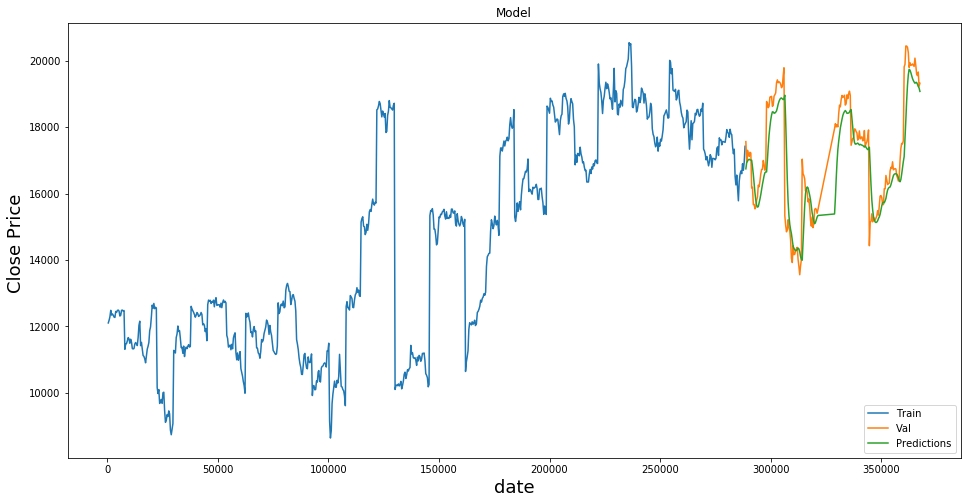

In [177]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [178]:
#Show the valid and predicted prices
valid

,close,Predictions
288825,17564.20,16743.513672
289200,16946.25,16928.763672
289575,17302.75,16972.876953
289950,17198.05,17018.101562
290325,17117.00,17031.347656
...,...,...
366074,19604.70,19347.482422
366449,19553.15,19294.707031
366824,19660.80,19223.583984
367199,19233.05,19180.015625


In [179]:
train.shape

(769, 1)

In [184]:
x = valid['Predictions']/valid['close']

In [185]:
shape = x.shape
print(shape)

(192,)


In [186]:
#sum of all values in x
a = x.sum()

In [187]:
#this is the accuracy of LSTM model
a/shape

array([0.98776621])

In [190]:
##Saving the model file
from tensorflow.keras.models import load_model

model.save('BANKNIFTY-LSTM.h5')

In [191]:
#to load the model
#model = load_model('BANKNIFTY-LSTM.h5')

In [192]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_6 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________
